In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
w = pd.read_csv('wine_quality.csv')
w.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#statistics
w.describe()
#we get to know that there are total 6497 values in each column and there are some missing values
#we will use the mean to fill in the null values cause it contains relative information of the column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
w.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
#we have seven columns with missing values
#so we will use the mean to fill in the null values because it contains relative information of the column

for col in w.columns:
    if col != 'type':
        w[col] = w[col].fillna(w[col].mean())

#checking if all the values have been filled
w.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

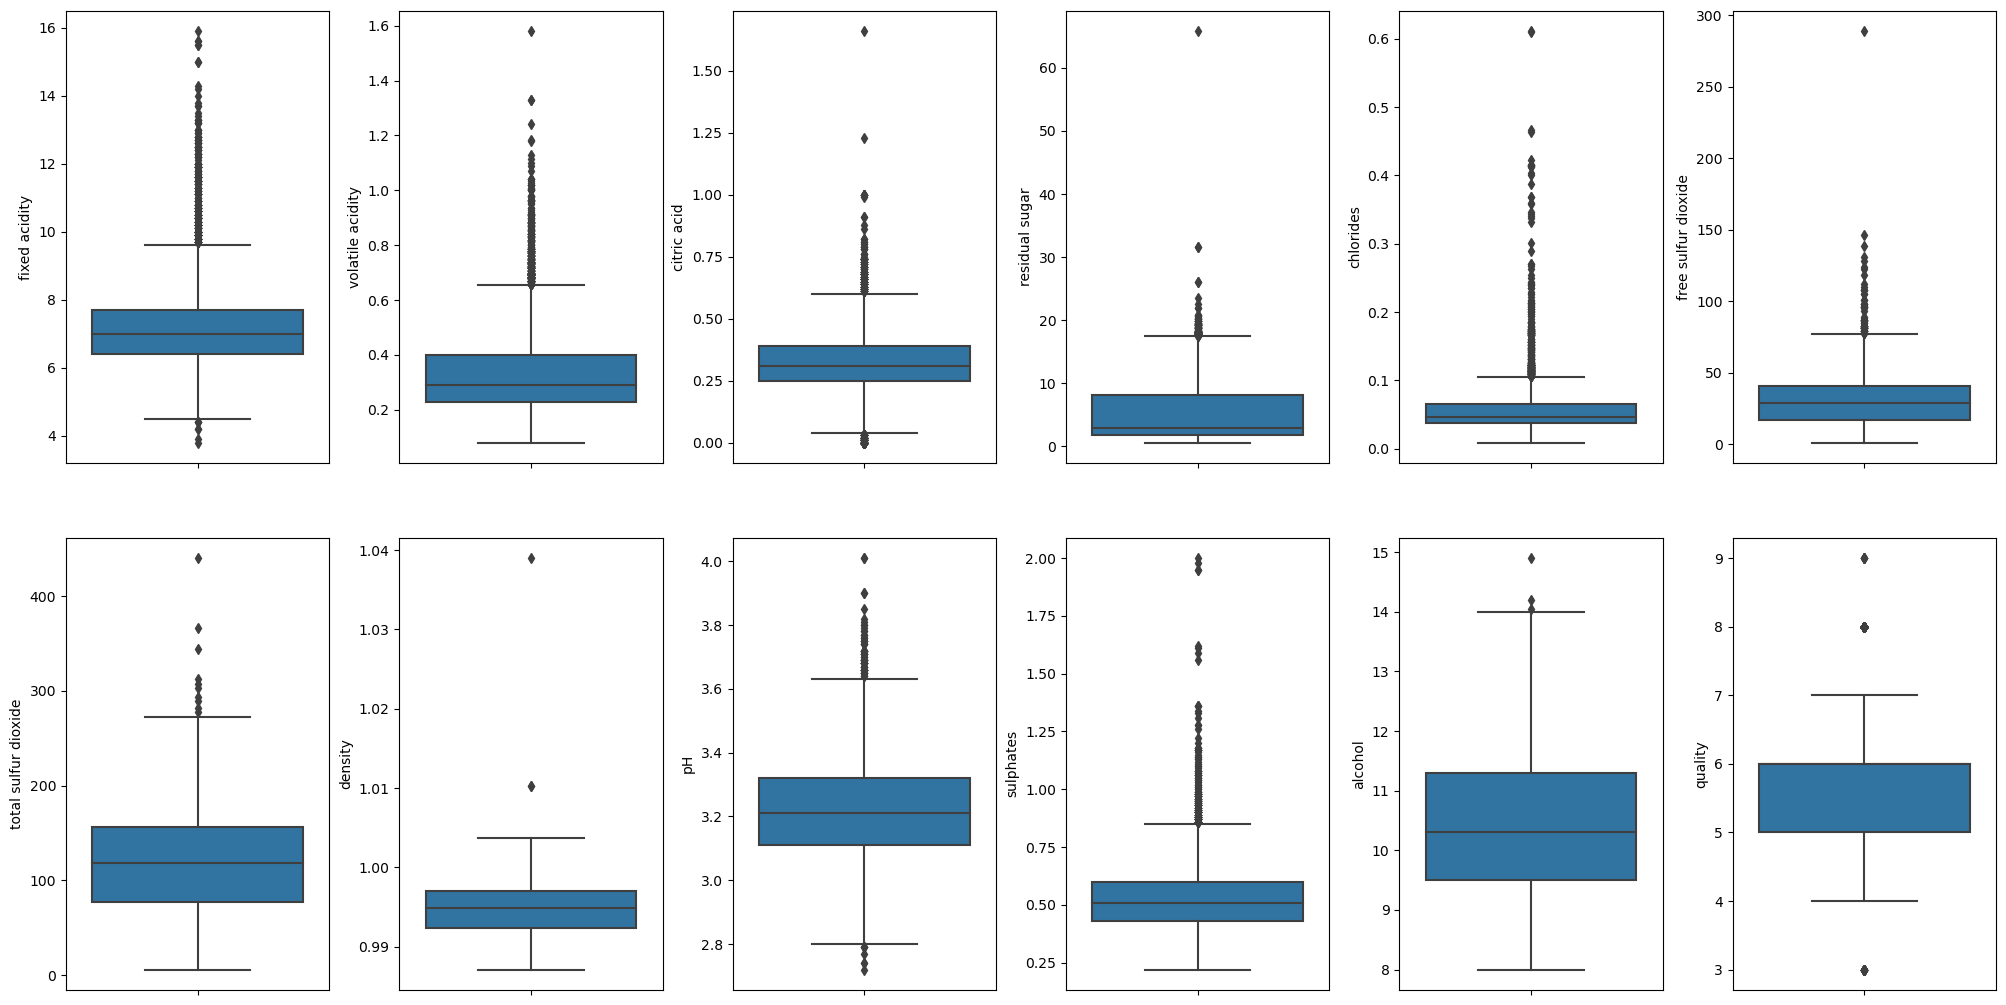

In [8]:
#checking for outliers using boxplot

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
i=0
ax=ax.flatten()

for col, value in w.items():
    if col != 'type':
        sns.boxplot(y=col, data=w, ax=ax[i])
        i+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

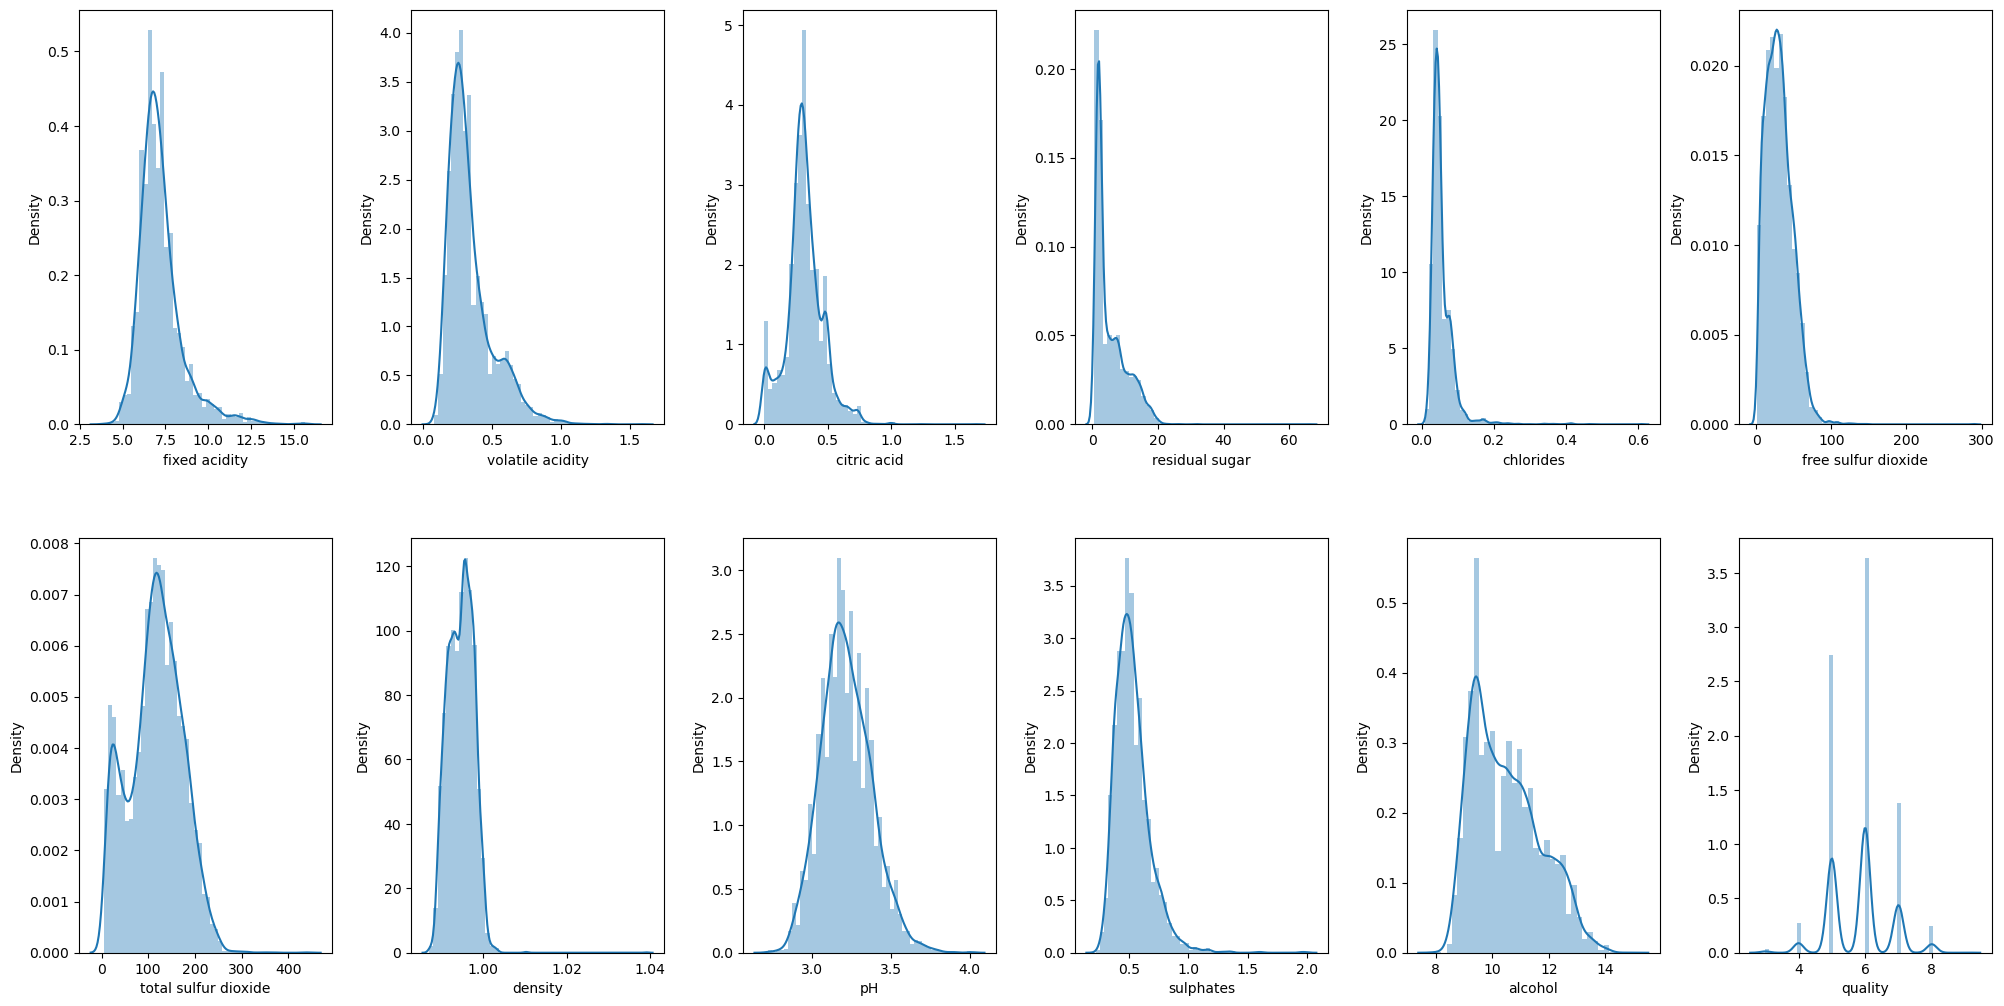

In [9]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
i=0
ax=ax.flatten()

for col, value in w.items():
    if col != 'type':
        sns.distplot(value, ax=ax[i])
        i+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [11]:
#there are prominent outliers in density,citric acid,residual sugar,chlorides and free sulfur dioxide
#we are removing those outliers using Interquartile Range (IQR) method

Q1_density = w['density'].quantile(0.25)
Q3_density = w['density'].quantile(0.75)
IQR =  Q3_density - Q1_density
lower_limit_density = Q1_density - 1.5 * IQR
upper_limit_density = Q3_density + 1.5 * IQR

Q1_citric_acid = w['citric acid'].quantile(0.25)
Q3_citric_acid = w['citric acid'].quantile(0.75)
IQR_citric_acid = Q3_citric_acid - Q1_citric_acid
lower_limit_citric_acid = Q1_citric_acid - 1.5 * IQR_citric_acid
upper_limit_citric_acid = Q3_citric_acid + 1.5 * IQR_citric_acid

Q1_residual_sugar = w['residual sugar'].quantile(0.25)
Q3_residual_sugar = w['residual sugar'].quantile(0.75)
IQR_residual_sugar = Q3_residual_sugar - Q1_residual_sugar
lower_limit_residual_sugar = Q1_residual_sugar - 1.5 * IQR_residual_sugar
upper_limit_residual_sugar = Q3_residual_sugar + 1.5 * IQR_residual_sugar

Q1_chlorides = w['chlorides'].quantile(0.25)
Q3_chlorides = w['chlorides'].quantile(0.75)
IQR_chlorides = Q3_chlorides - Q1_chlorides
lower_limit_chlorides = Q1_chlorides - 1.5 * IQR_chlorides
upper_limit_chlorides = Q3_chlorides + 1.5 * IQR_chlorides

Q1_free_sulfur_dioxide = w['free sulfur dioxide'].quantile(0.25)
Q3_free_sulfur_dioxide = w['free sulfur dioxide'].quantile(0.75)
IQR_free_sulfur_dioxide = Q3_free_sulfur_dioxide - Q1_free_sulfur_dioxide
lower_limit_free_sulfur_dioxide = Q1_free_sulfur_dioxide - 1.5 * IQR_free_sulfur_dioxide
upper_limit_free_sulfur_dioxide = Q3_free_sulfur_dioxide + 1.5 * IQR_free_sulfur_dioxide

wine = w[(w['density'] >= lower_limit_density) & (w['density'] <= upper_limit_density) &
               (w['citric acid'] >= lower_limit_citric_acid) & (w['citric acid'] <= upper_limit_citric_acid) &
               (w['residual sugar'] >= lower_limit_residual_sugar) & (w['residual sugar'] <= upper_limit_residual_sugar) &
               (w['chlorides'] >= lower_limit_chlorides) & (w['chlorides'] <= upper_limit_chlorides) &
               (w['free sulfur dioxide'] >= lower_limit_free_sulfur_dioxide) & (w['free sulfur dioxide'] <= upper_limit_free_sulfur_dioxide)]

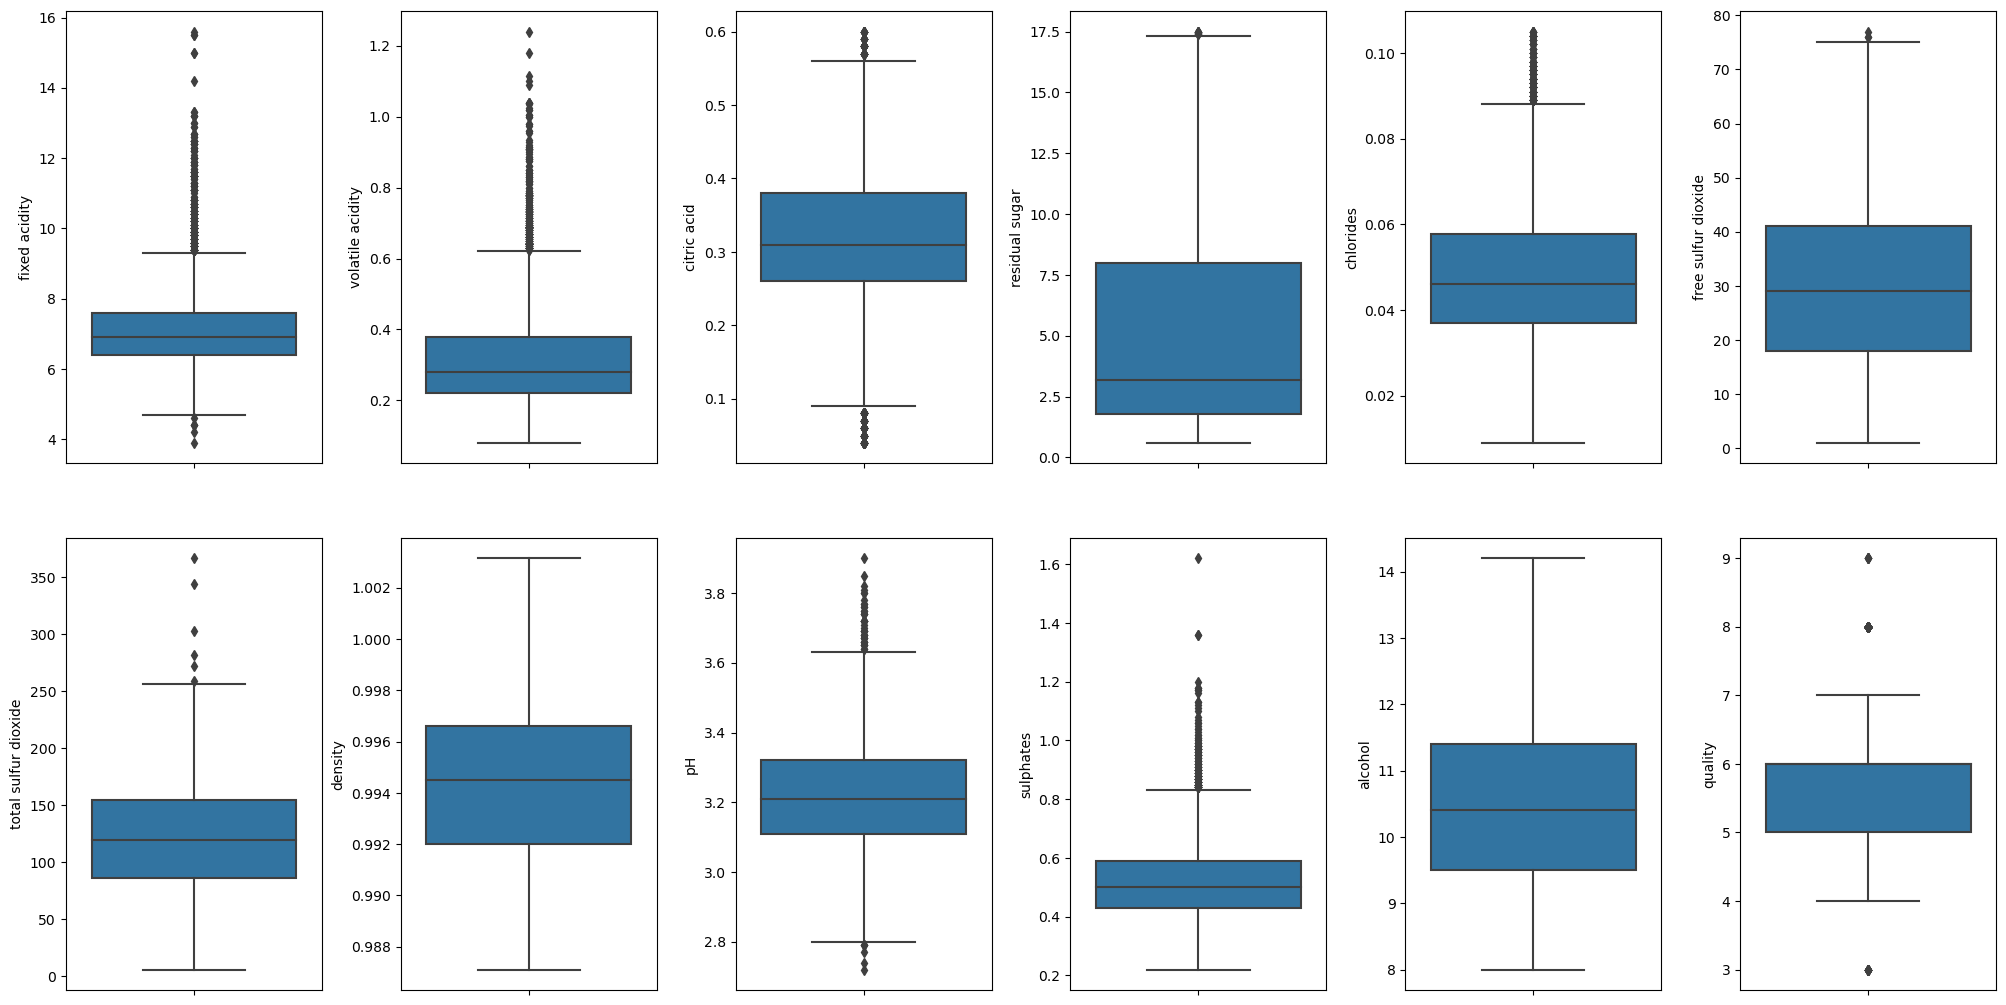

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
i=0
ax=ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine, ax=ax[i])
        i+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

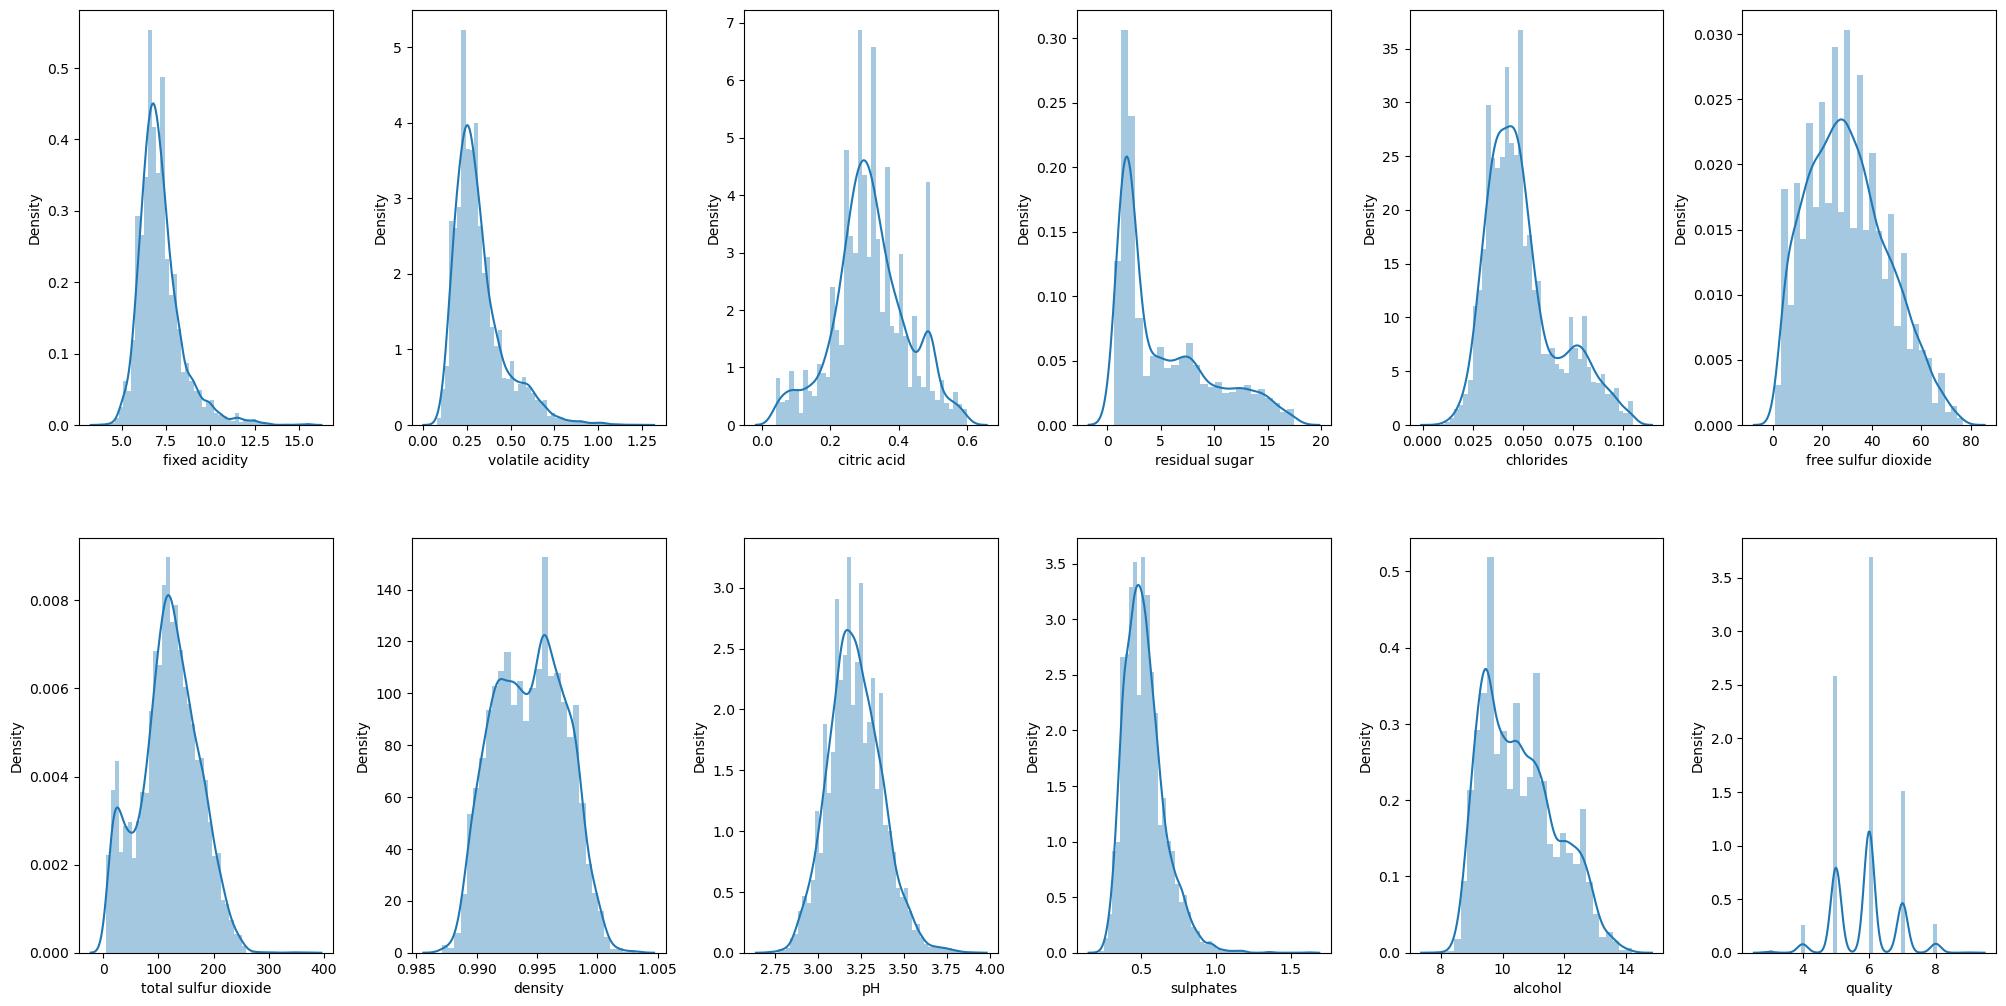

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
i=0
ax=ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.distplot(value, ax=ax[i])
        i+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='type', ylabel='count'>

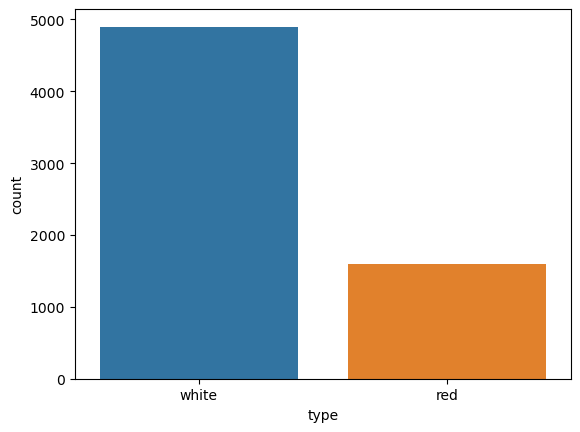

In [14]:
sns.countplot(data=w, x='type')
#most of the values are for white wine dataset 

<Axes: xlabel='quality', ylabel='count'>

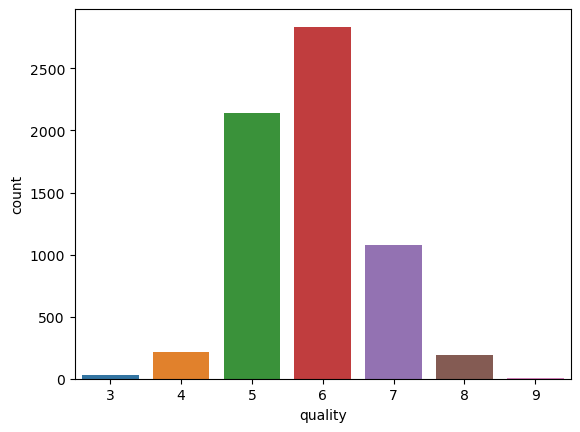

In [15]:
#checking for class imbalancement
sns.countplot(data=w, x='quality')

#there are more values for classes 5-7 so the prediction will be in those classes only
#we need to remove this imbalancement

<Axes: >

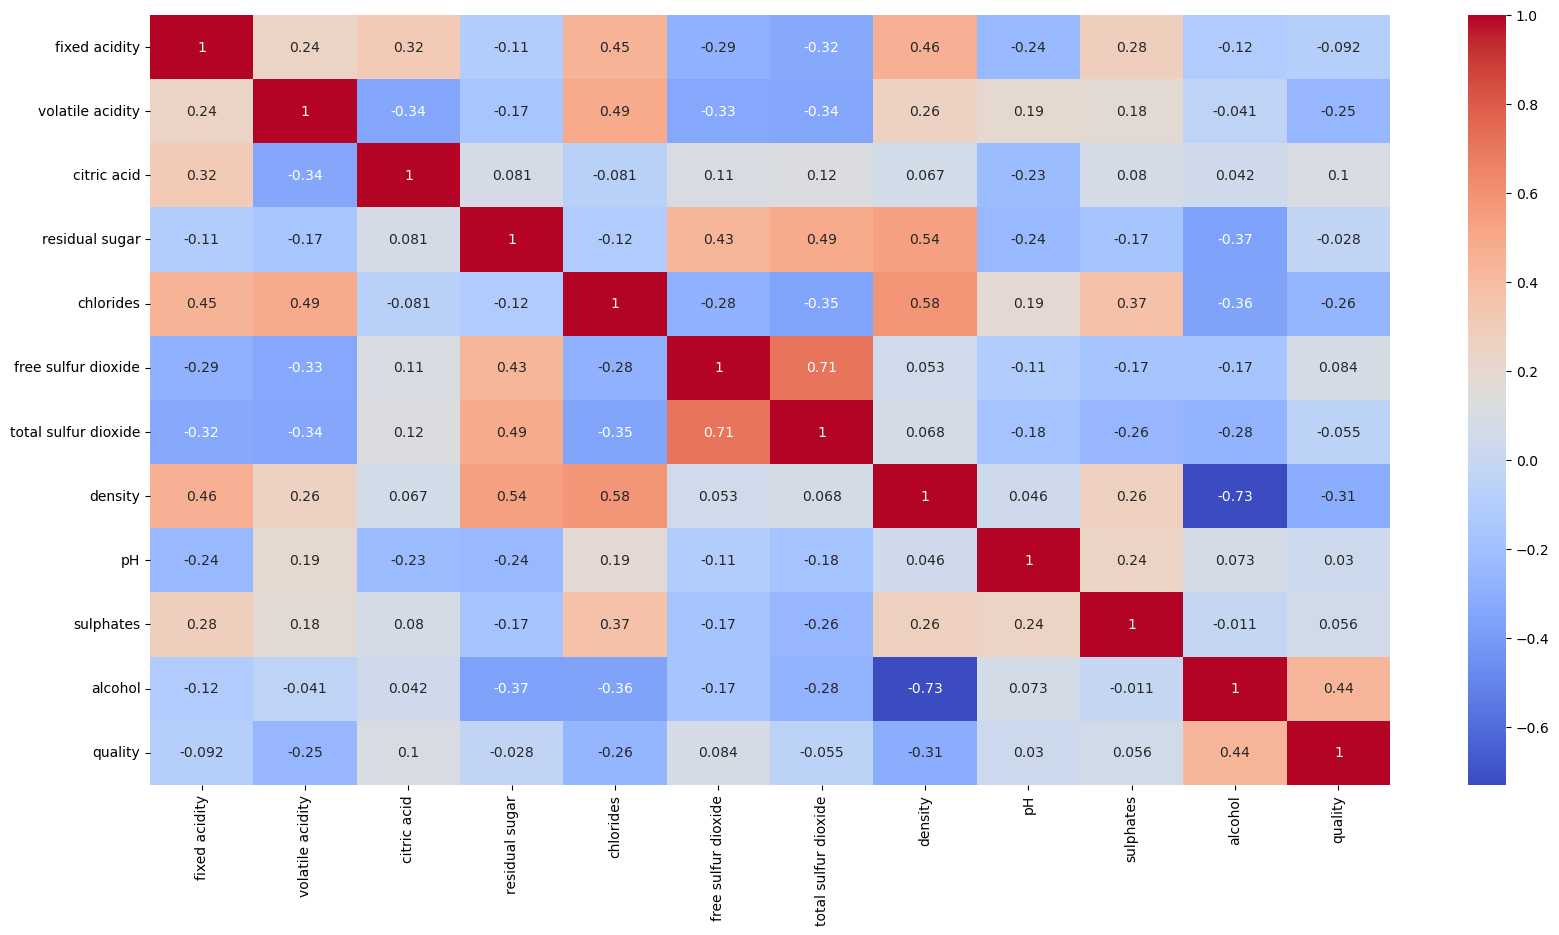

In [16]:
corr = wine.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [17]:
#dropping the unwanted columns
X = wine.drop(columns=['type', 'quality'])
y = wine['quality']

In [18]:
y.value_counts()

6    2476
5    1731
7    1010
8     182
4     173
3      17
9       5
Name: quality, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

#transform the dataset
X, y = oversample.fit_resample(X, y)

In [20]:
y.value_counts()

6    2476
5    2476
7    2476
8    2476
4    2476
3    2476
9    2476
Name: quality, dtype: int64

In [28]:
#splitting the dataset into training and testing

from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(x_train)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
5239        7.900000          0.340000     0.420000        2.000000   
13300       6.581314          0.154858     0.318131        5.951416   
14651       6.706719          0.322609     0.356641        6.620156   
12562       6.792163          0.418934     0.316583        1.794670   
15898       8.175749          0.253690     0.401069        5.924375   
...              ...               ...          ...             ...   
11284       7.385601          0.299280     0.240000        2.078719   
11964       7.661492          0.281359     0.388414        8.784476   
5390        7.500000          0.610000     0.260000        1.900000   
860         8.300000          0.230000     0.430000        3.200000   
15795       7.081822          0.269089     0.476367        2.381779   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
5239    0.086000             8.000000             19.000000  0.995460   
1

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

#we are normalizing it as it is unbalanced
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

print(new_xtrain)

[[0.34482759 0.22413793 0.67857143 ... 0.52586207 0.26618705 0.56666667]
 [0.23114776 0.06453307 0.49666321 ... 0.38696452 0.3375267  0.6858248 ]
 [0.24195851 0.20914609 0.56542976 ... 0.20117184 0.06142082 0.69664067]
 ...
 [0.31034483 0.45689655 0.39285714 ... 0.48275862 0.21582734 0.3       ]
 [0.37931034 0.12931034 0.69642857 ... 0.35344828 0.09352518 0.58333333]
 [0.27429501 0.16300771 0.77922605 ... 0.53605168 0.13276736 0.81363702]]


In [29]:
#we are using random forest classifier for wine quality prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rnd = RandomForestClassifier()
fit_rnd = rnd.fit(new_xtrain, y_train)
y_predict = rnd.predict(new_xtest)

#the score for the model
rnd_score = rnd.score(new_xtest, y_test)
print('Score: ', rnd_score*100)

#the mse and rmse are calculated here
rnd_MSE = mean_squared_error(y_test, y_predict)
rnd_RMSE = np.sqrt(rnd_MSE)
print('Mean Squared Error: ', rnd_MSE*100)
print('Root Mean Squared Error: ', rnd_RMSE*100)

Score:  88.32217862912532
Mean Squared Error:  17.147472882529424
Root Mean Squared Error:  41.409507220600226


In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       606
           4       0.91      0.98      0.94       636
           5       0.77      0.76      0.76       612
           6       0.73      0.61      0.66       637
           7       0.82      0.87      0.84       612
           8       0.94      0.97      0.95       619
           9       1.00      1.00      1.00       611

    accuracy                           0.88      4333
   macro avg       0.88      0.88      0.88      4333
weighted avg       0.88      0.88      0.88      4333



In [32]:
#we created a list for the predicted values and displayed them in a dataframe

x_predict = list(rnd.predict(x_test))
predicted_wine = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(predicted_wine).head(20)

,predicted_values,original_values
6237,7,3
6205,7,3
15462,7,9
4902,8,5
1411,8,6
12639,8,8
3268,8,7
9801,8,4
10021,7,4
12694,8,8
